# Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# 1. Read The Data

In [2]:
# Read data

df = pd.read_csv('Jan_2019_ontime.csv')

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [3]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [5]:

df = df.rename(columns={"OP_UNIQUE_CARRIER": "AIRLINE_CODE","DEP_DEL15":"DELAYED"})

In [6]:
# We want to process all flights excluding Cancelled and Diverted
df = df[(df['CANCELLED']==0) & (df['DIVERTED']==0)]
df.head()
    

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [7]:
# Drop Unnecessary Features
df.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21','OP_CARRIER','ARR_DEL15','CANCELLED', 'DIVERTED'], axis='columns', inplace=True)

<AxesSubplot:xlabel='DELAYED', ylabel='count'>

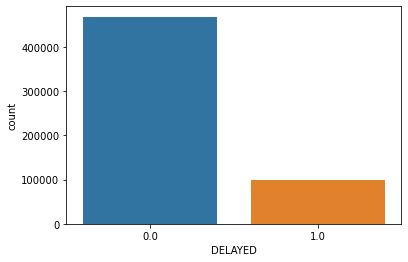

In [8]:
sns.countplot(df['DELAYED'])

In [9]:
df.isnull().mean()

DAY_OF_MONTH    0.0
DAY_OF_WEEK     0.0
AIRLINE_CODE    0.0
ORIGIN          0.0
DEST            0.0
DEP_TIME        0.0
DELAYED         0.0
DEP_TIME_BLK    0.0
ARR_TIME        0.0
DISTANCE        0.0
dtype: float64

In [10]:
df.shape

(565963, 10)

# 2. EDA

In [11]:
#Insert EDA Here

# 3. Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DAY_OF_MONTH  565963 non-null  int64  
 1   DAY_OF_WEEK   565963 non-null  int64  
 2   AIRLINE_CODE  565963 non-null  object 
 3   ORIGIN        565963 non-null  object 
 4   DEST          565963 non-null  object 
 5   DEP_TIME      565963 non-null  float64
 6   DELAYED       565963 non-null  float64
 7   DEP_TIME_BLK  565963 non-null  object 
 8   ARR_TIME      565963 non-null  float64
 9   DISTANCE      565963 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 67.5+ MB


In [13]:
# Encode Categorical data
le =LabelEncoder()
Category = ['AIRLINE_CODE','ORIGIN','DEST','DEP_TIME_BLK']
for i in Category:
    df[i]=le.fit_transform(df[i])

In [14]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_CODE,ORIGIN,DEST,DEP_TIME,DELAYED,DEP_TIME_BLK,ARR_TIME,DISTANCE
0,1,2,0,128,19,601.0,0.0,1,722.0,300.0
1,1,2,0,225,80,1359.0,0.0,9,1633.0,596.0
2,1,2,0,95,80,1215.0,0.0,7,1329.0,229.0
3,1,2,0,325,19,1521.0,0.0,10,1625.0,223.0
4,1,2,0,19,120,1847.0,0.0,14,1940.0,579.0


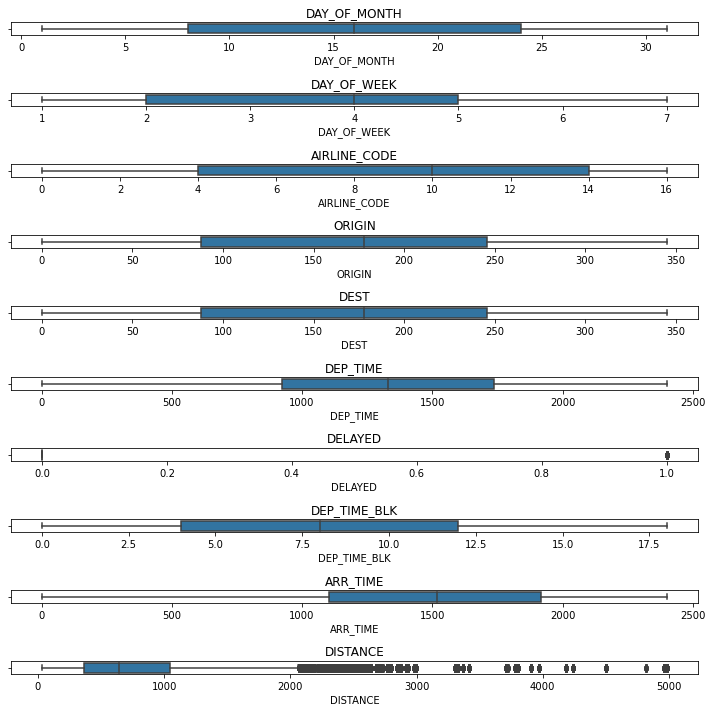

In [15]:
fig,ax = plt.subplots(len(df.columns),1,figsize =(10,10))
j =0
for i in df.columns:
    sns.boxplot(df[i], ax = ax[j]).set_title(i)
    plt.tight_layout()
    j += 1

In [16]:
df['DISTANCE'] = np.log(df['DISTANCE'])

# 3. Modelling

## Split Data

In [17]:
X = df.drop('DELAYED',axis=1).values
y =df['DELAYED'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standard Scaller

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Fit and Predict

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [20]:
model = {'RandomForest' : RandomForestClassifier(),
         'Gaussian NB' : GaussianNB(),
         'XGBoost' : XGBClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Ada Boost':AdaBoostClassifier()
         }
result={}
Accuracy = []
Precision = []
Recall = []
for key,value in model.items():
    
    model = value
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    F1 = f1_score(y_test, y_pred)
    result[key]= F1
    
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))


base_model = pd.DataFrame(result.items(), columns=['Base Model', 'F1_Score'])
base_model['Accuracy']=Accuracy
base_model['Precision']=Precision
base_model['Recall']=Recall
base_model = base_model.sort_values('F1_Score', ascending=False).reset_index(drop=True)
base_model

[18:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Base Model,F1_Score,Accuracy,Precision,Recall
0,RandomForest,0.779468,0.934613,0.938621,0.666463
1,XGBoost,0.770480,0.931898,0.926839,0.659262
2,Decision Tree,0.762245,0.918034,0.766738,0.757804
3,Gaussian NB,0.184366,0.809428,0.357408,0.124223
4,Ada Boost,0.161674,0.835820,0.704957,0.091307
